In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import joblib


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


In [19]:
df = pd.read_csv('Hailfall.csv')
df.head()

,day,pressure,maxtemp,temperature,mintemp,dewpoint,humidity,cloud,hailfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,no,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,no,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,no,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [20]:
df.shape

(233, 12)

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            233 non-null    int64  
 1   pressure       233 non-null    float64
 2   maxtemp        233 non-null    float64
 3   temperature    233 non-null    float64
 4   mintemp        233 non-null    float64
 5   dewpoint       233 non-null    float64
 6   humidity       233 non-null    int64  
 7   cloud          233 non-null    int64  
 8   hailfall       233 non-null    object 
 9   sunshine       233 non-null    float64
 10  winddirection  233 non-null    float64
 11  windspeed      233 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 22.0+ KB


In [22]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
day,233.0,117.000000,67.405489,1.0,59.0,117.0,175.0,233.0
pressure,233.0,1018.724464,3.139041,1014.0,1015.8,1018.5,1021.1,1025.9
maxtemp,233.0,21.048498,0.747991,19.3,20.7,21.2,21.6,22.6
temperature,233.0,19.735193,0.879389,17.7,19.3,19.9,20.4,21.3
mintemp,233.0,18.339914,0.958039,16.1,17.9,18.6,19.1,20.2
dewpoint,233.0,16.581545,1.268876,13.1,15.9,17.0,17.5,19.9
humidity,233.0,72.922747,3.616658,67.0,71.0,73.0,74.0,95.0
cloud,233.0,49.738197,8.150267,36.0,45.0,49.0,54.0,91.0
sunshine,233.0,6.490987,2.687945,0.0,6.0,7.1,8.1,9.9
winddirection,233.0,66.480687,11.506026,30.0,60.0,70.0,75.0,80.0


In [23]:
df.isnull().sum()


day              0
pressure         0
maxtemp          0
temperature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
hailfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [24]:
df.columns


Index(['day', 'pressure', 'maxtemp', 'temperature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'hailfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [25]:
df.rename(str.strip,
		axis='columns', 
		inplace=True)

df.columns


Index(['day', 'pressure', 'maxtemp', 'temperature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'hailfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [26]:
for col in df.columns:
   if df[col].isnull().sum() > 0:
       val=df[col].mean()
       df[col]=df[col].fillna(val)
	
df.isnull().sum().sum()


0

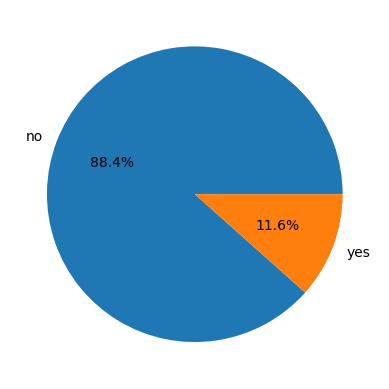

In [27]:
plt.pie(df['hailfall'].value_counts().values,
		labels = df['hailfall'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


In [28]:
df.groupby('hailfall').mean()


,day,pressure,maxtemp,temperature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
hailfall,,,,,,,,,,,
no,120.126214,1018.961165,21.033981,19.705825,18.301456,16.512621,72.563107,49.106796,7.320388,69.854369,23.198058
yes,93.148148,1016.918519,21.159259,19.959259,18.633333,17.107407,75.666667,54.555556,0.162963,40.740741,20.014815


In [29]:
features = list(df.select_dtypes(include = np.number).columns)
features.remove('day')
print(features)


['pressure', 'maxtemp', 'temperature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


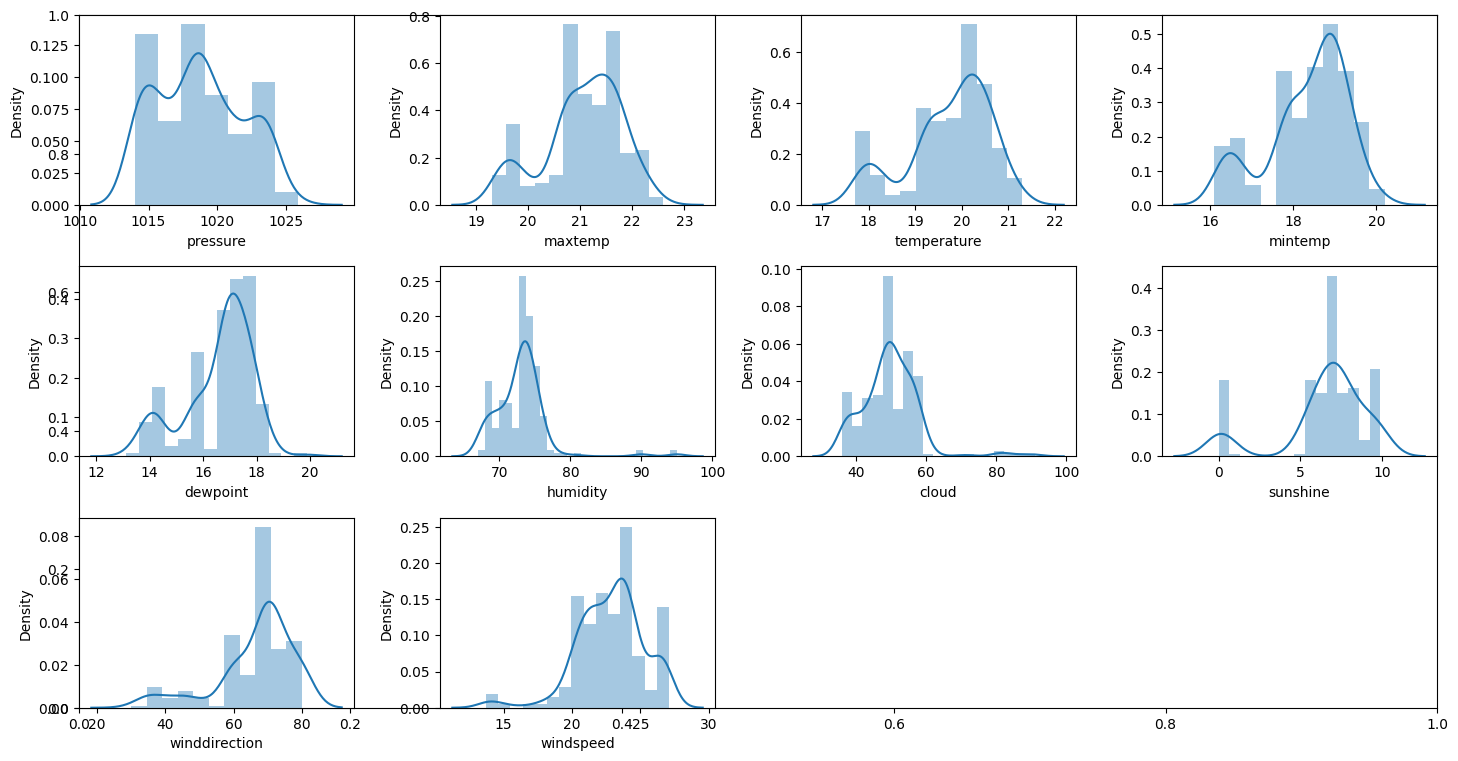

In [30]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
    plt.subplot(3,4, i + 1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()


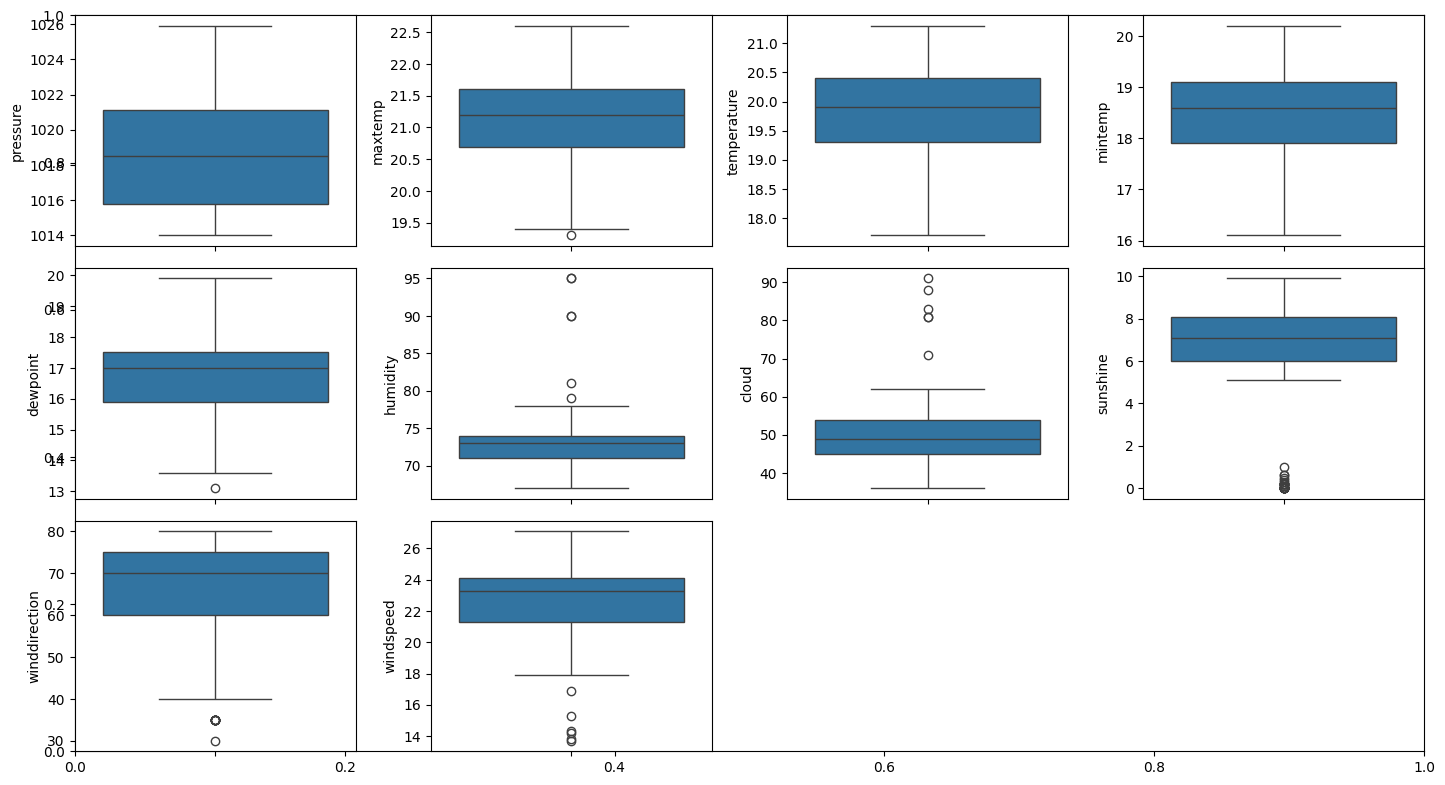

In [31]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
    plt.subplot(3,4, i + 1)
    sb.boxplot(df[col])
plt.tight_layout()
plt.show()


In [32]:
df.replace({'yes':1, 'no':0}, inplace=True)


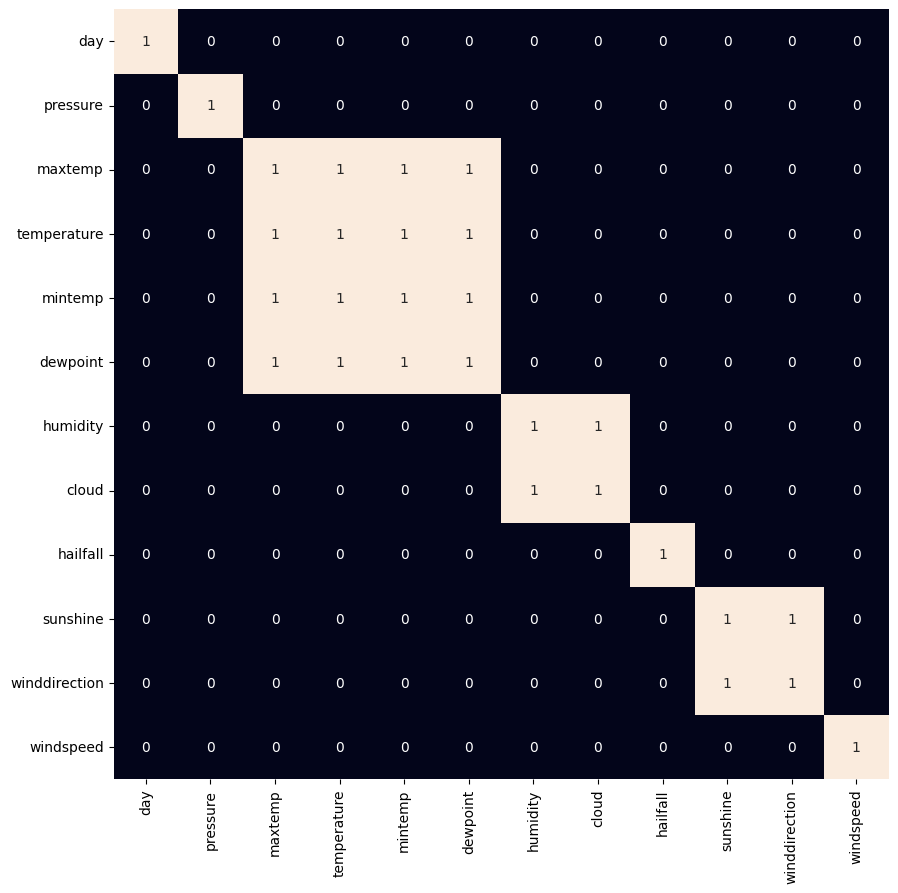

In [33]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8,
		annot=True,
		cbar=False)
plt.show()


In [34]:
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)


In [35]:
features = df.drop(['day', 'hailfall'], axis=1)
target = df.hailfall


In [36]:
X_train, X_val, \
	Y_train, Y_val = train_test_split(features,target,test_size=0.2,stratify=target,random_state=2)
ros = RandomOverSampler(sampling_strategy='minority',random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)


In [37]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)


In [38]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]

for i in range(3):
    models[i].fit(X, Y)

    print(f'{models[i]} : ')

    train_preds = models[i].predict_proba(X) 
    print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:,1]))

    val_preds = models[i].predict_proba(X_val) 
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, val_preds[:,1]))
    print()


LogisticRegression() : 
Training Accuracy :  0.9995910172516359
Validation Accuracy :  1.0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  1.0

SVC(probability=True) : 
Training Accuracy :  1.0
Validation Accuracy :  1.0



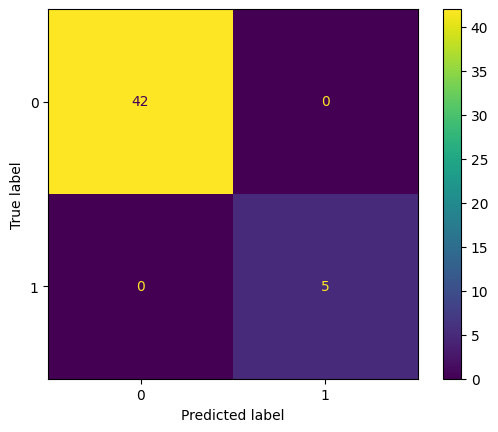

In [39]:
predictions = models[2].predict(X_val)
cm = confusion_matrix(Y_val, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[2].classes_)
disp.plot()
plt.show()

In [40]:
print(metrics.classification_report(Y_val,
									models[2].predict(X_val)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00         5

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



In [41]:
# Save the trained model
joblib.dump(models[2], 'svm_model.pkl')


['svm_model.pkl']

In [49]:
loaded_model = joblib.load('svm_model.pkl')

In [56]:
new_data = pd.read_csv('test.csv')

# Check loaded model
print("Loaded Model:", loaded_model)

# Check new data
print("New Data Head:")
print(new_data.head())

# Verify column names
print("Column Names:")
print(new_data.columns)

# Preprocess the new data (if necessary)

# Make predictions on the new data
predictions = loaded_model.predict(new_data)

# Print predictions
print("Predictions:")
print(predictions)

Loaded Model: SVC(probability=True)
New Data Head:
   pressure  temperature  dewpoint  humidity  cloud  sunshine  winddirection  \
0    1014.7         19.6      16.8        79     71       0.0           35.0   

   windspeed  
0       13.8  
Column Names:
Index(['pressure', 'temperature', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')
Predictions:
[0]
